<a href="https://colab.research.google.com/github/Brentlang/cap-comp215/blob/main/Brent%20Project1_neo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project One- Neo Plots
----------------
#### Name:  Brent Langford
#### Date:  Feb 12th, 2023



In [ ]:
import datetime, json, requests
from pprint import pprint    # Pretty Print - built-in python function to nicely format data structures
import matplotlib.pyplot as plt
from datetime import datetime

**Instructions:**
1. Press "Runtime" in the ribbon, then press "Run all"

2. Enter a date in the form YYYY-MM-DD , Ex. 2023-02-12. This will be the start (start date) of the interval in which asteroid data is pulled. Hit enter

3. Enter a date that is within 7 days after the start date in the same format YYYY-MM-DD, this will be the end of the interval in which asteroid data is pulled. Hit enter

4. Next type True if you want the scatter plot to include non potentially hazardous asteroids, or enter False if you want the scatter plot to only show potentially hazardous asteroids within the set date interval. Hit enter

5. Scroll down to view the scatter plot

6. Repeat steps 1-5 as many times as wanted

Please enter a neo start date in the form YYYY-MM-DD, the start and end date have to be within one week of eachother: 2023-02-05
Please enter a neo end date in the form YYYY-MM-DD: 2023-02-10
Enter True to include or False to exclude non hazardous Asteroids: True


Text(0.5, 1.0, 'Asteroids missed km distance over a week')

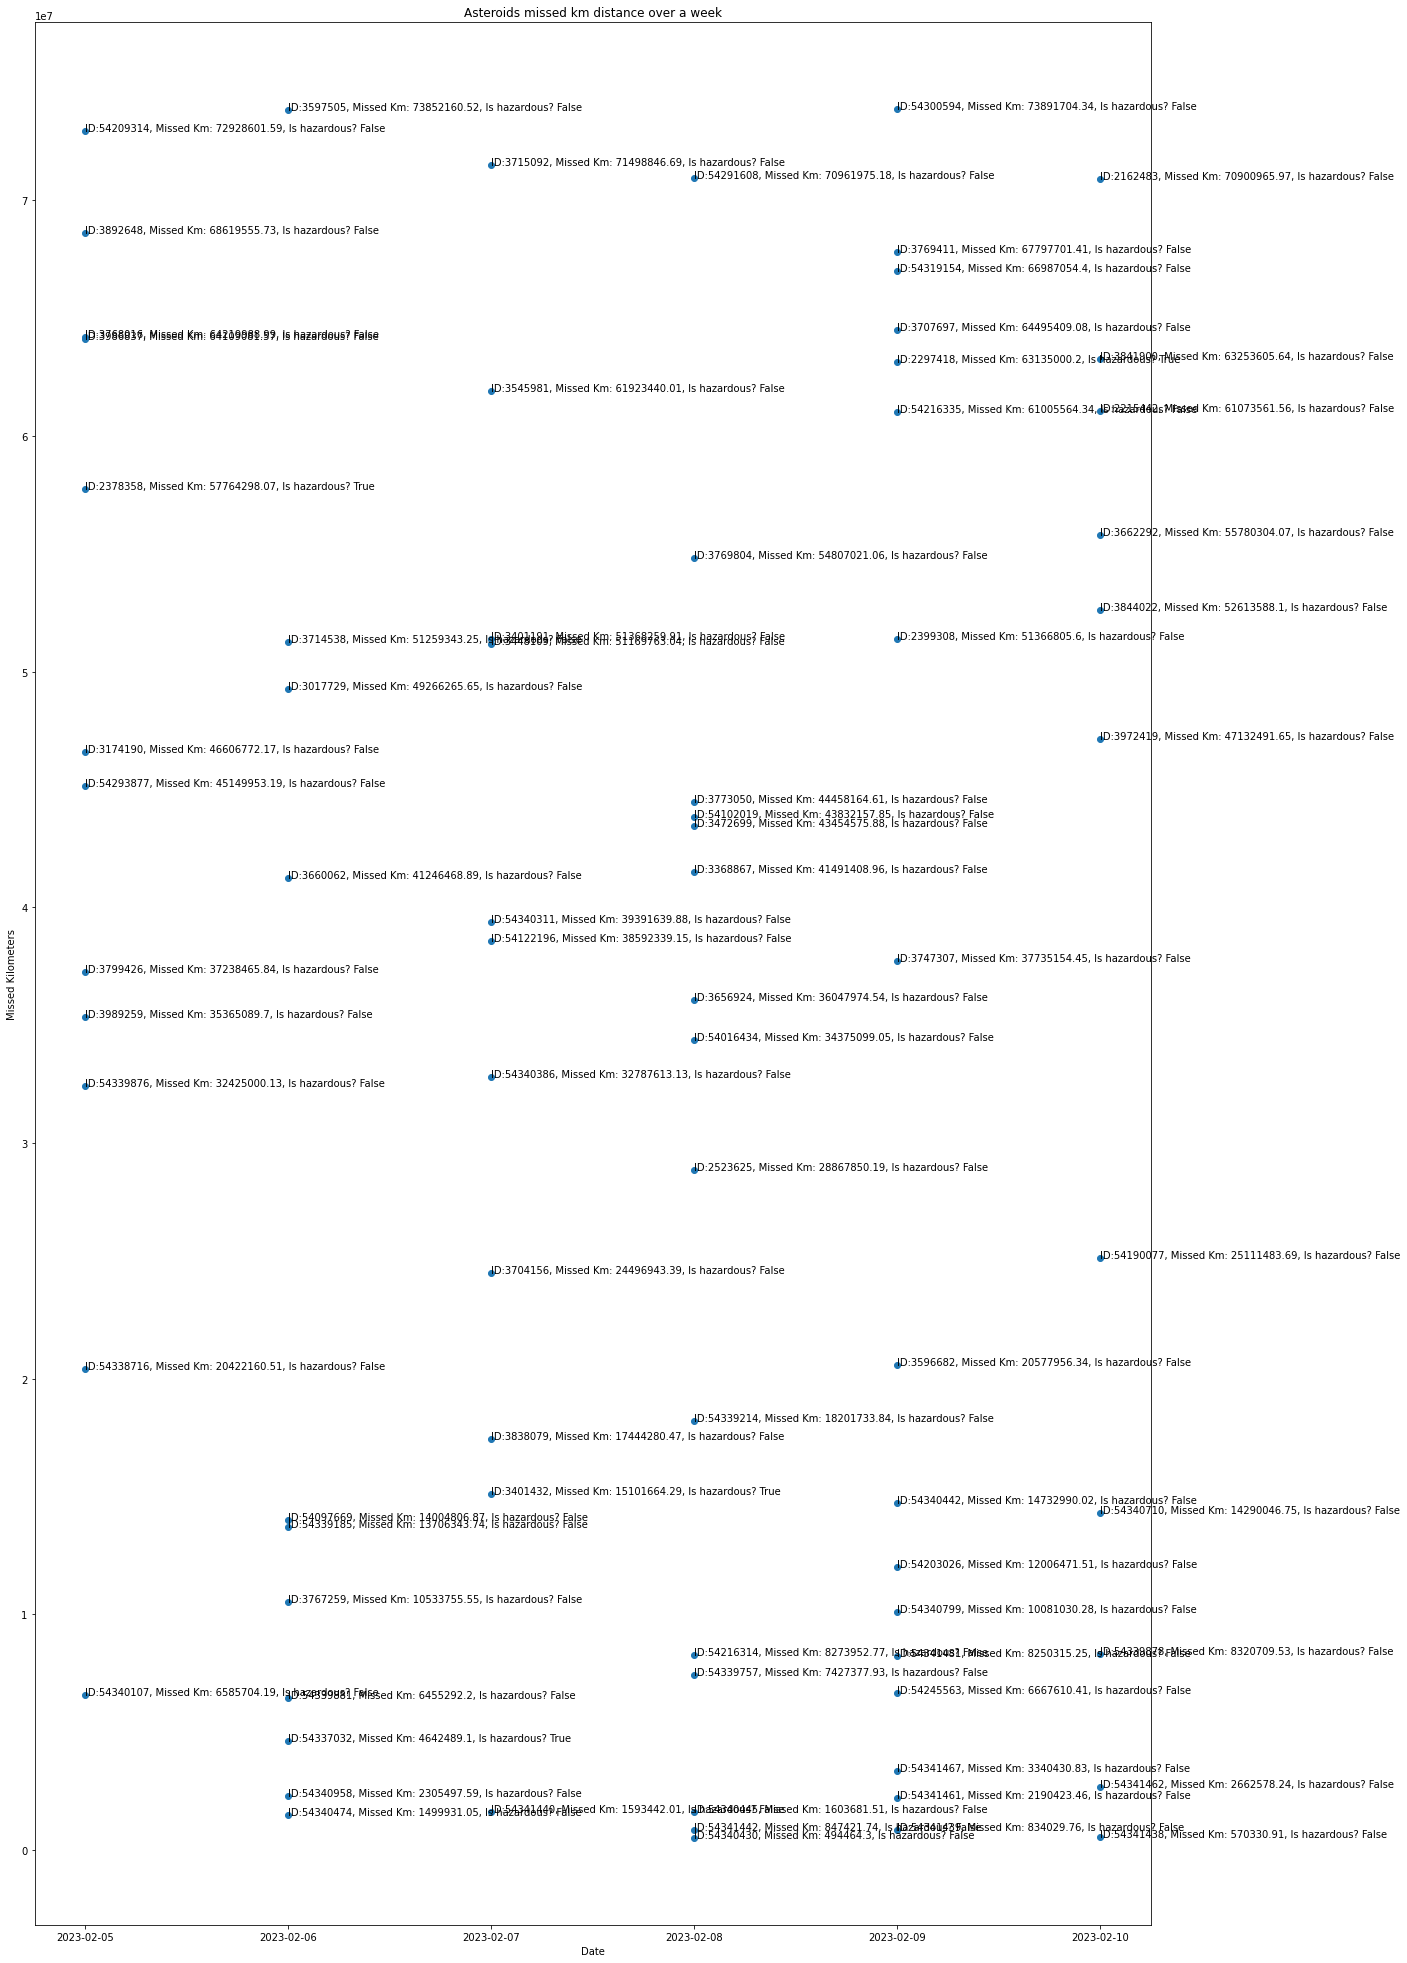

In [ ]:
start_date =input("Please enter a neo start date in the form YYYY-MM-DD, the start and end date have to be within one week of eachother: ")
end_date = input("Please enter a neo end date in the form YYYY-MM-DD: ")
intermediate_haz= input("Enter True to include or False to exclude non hazardous Asteroids: ")
if intermediate_haz=="True":
  hazardous=True
elif intermediate_haz=="False":
  hazardous=False

API_KEY = 'DEMO_KEY' 
url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&end_date={end_date}&api_key={API_KEY}'
response = requests.request("GET", url, headers={}, data={})
data = json.loads(response.text)  # recall json.loads for lab 1


neos = data['near_earth_objects']
neo_keys= list(neos.keys())


if hazardous== True:
  # Creates lists for id, date, near miss in km of potentially hazardous and non hazardous asteroids
  ids=[neos[i][ast]['id'] for i in neo_keys for ast in range(0,len(neos[i]))]
  date=[datetime.strptime(neos[i][ast]['close_approach_data'][0]['close_approach_date'],'%Y-%m-%d') for i in neo_keys for ast in range(0,len(neos[i]))]
  near_miss_km=[neos[i][ast]['close_approach_data'][0]['miss_distance']['kilometers'] for i in neo_keys for ast in range(0,len(neos[i]))]
  is_hazardous=[neos[i][ast]['is_potentially_hazardous_asteroid'] for i in neo_keys for ast in range(0,len(neos[i]))]
elif hazardous== False:
   # Creates lists for id, date, near miss in km of potentially hazardous asteroids
  hazards= [neos[i][ast]  for i in neo_keys for ast in range(0,len(neos[i])) if neos[i][ast]['is_potentially_hazardous_asteroid'] == True]
  ids=[hazards[ast]['id'] for ast in range(0,len(hazards))]
  date=[datetime.strptime(hazards[ast]['close_approach_data'][0]['close_approach_date'],'%Y-%m-%d') for ast in range(0,len(hazards))]
  near_miss_km=[hazards[ast]['close_approach_data'][0]['miss_distance']['kilometers'] for i in hazards for ast in range(0,len(hazards))]
  is_hazardous=[hazards[ast]['is_potentially_hazardous_asteroid'] for i in hazards for ast in range(0,len(hazards))]
# print(ids)
# pprint(hazards)
neo_data= list(zip(ids,date,near_miss_km,is_hazardous))
# creates a list of tuples for each asteroid containing information about ids, date of approach, near miss in km and if its potentially hazardous

result = sorted(neo_data, key=lambda x: x[1])
# sorts the list of tuples by approach date  credit to Razzaghnoori, https://stackoverflow.com/questions/54094178/sorting-datetime-object-in-a-list-of-tuples

formatted_date=[(i[0],i[1].strftime("%Y-%m-%d"),round(float(i[2]),2),i[3]) for i in result]
# converts date back to string in format year-month-day

id_list=[i[0] for i in formatted_date]
date_list=[i[1] for i in formatted_date]
miss_km_list=[(i[2]) for i in formatted_date]


plt.rcParams["figure.figsize"] = (20,35)
fig, ax = plt.subplots()
ax.scatter(date_list,miss_km_list)
for (x,y,z,z1) in formatted_date:
  plt.annotate((f'ID:{x}, Missed Km: {z}, Is hazardous? {z1}'),(y,z))

ax.set_xlabel('Date')
ax.set_ylabel('Missed Kilometers')
ax.set_title("Asteroids missed km distance over a week")
